In [2]:
import pandas as pd
import json

with open('../data/worldbank_data.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

pivot_df = df.pivot(index=['country', 'year'], columns='meaning', values='value').reset_index()
pivot_df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in pivot_df.columns]
pivot_df.describe()

,Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e,Forest_area_%_of_land_area,"PM2.5_air_pollution,_mean_annual_exposure_micrograms_per_cubic_meter",Renewable_energy_consumption_%_of_total_final_energy_consumption
count,13554.000000,8409.000000,7688.000000,8234.000000
mean,884.153969,32.494707,28.317114,31.251194
std,3117.491830,23.440415,16.331707,29.694407
min,0.000000,0.000000,4.895181,0.000000
25%,1.374075,12.329931,16.755707,5.400000
50%,17.273550,31.150263,23.986899,21.500000
75%,187.764800,47.594804,38.970746,54.100000
max,39023.937039,96.226381,107.144665,98.300000


In [3]:
pivot_df.to_csv('../data/worldbank_data.csv', index=False)

In [11]:
with open('../data/countries_data.json') as f:
	data = json.load(f)

countries_df = pd.DataFrame(data[0])
countries_df = countries_df[countries_df['capitalCity'] != ""].copy()

In [12]:
countries_df["name"].head(10)

0                    Aruba
2              Afghanistan
5                   Angola
6                  Albania
7                  Andorra
9     United Arab Emirates
10               Argentina
11                 Armenia
12          American Samoa
13     Antigua and Barbuda
Name: name, dtype: object

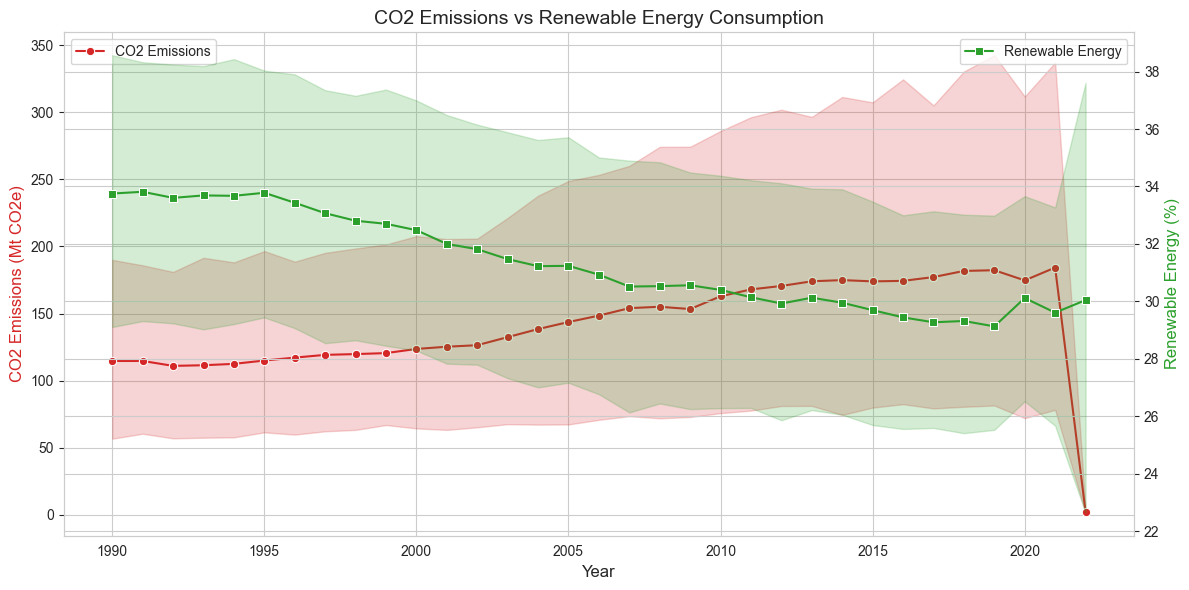

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Фильтрация данных (ваш оригинальный код)
country_df = pivot_df[pivot_df['country'].isin(countries_df["name"])].copy()
df_clean = country_df.dropna(subset=['Renewable_energy_consumption_%_of_total_final_energy_consumption'])

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Создание графиков с двумя осями
ax1 = sns.lineplot(data=df_clean, x='year', y='Carbon_dioxide_CO2_emissions_total_excluding_LULUCF_Mt_CO2e', 
                   color='tab:red', marker='o', label='CO2 Emissions')
ax2 = ax1.twinx()
sns.lineplot(data=df_clean, x='year', y='Renewable_energy_consumption_%_of_total_final_energy_consumption', 
            ax=ax2, color='tab:green', marker='s', label='Renewable Energy')

# Настройка отображения дат
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=45, ha='right')

# Оформление графиков
ax1.set_title('CO2 Emissions vs Renewable Energy Consumption', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('CO2 Emissions (Mt CO2e)', color='tab:red', fontsize=12)
ax2.set_ylabel('Renewable Energy (%)', color='tab:green', fontsize=12)

plt.tight_layout()
plt.show()